### Exploration

##### Importing Packages

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sci
import scipy.constants as const
import warnings

##### Setting Display Options

In [2]:
%config InlineBackend.figure_formats = ['png']

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color = ['olivedrab', 'steelblue', 'firebrick', 'goldenrod'])
mpl.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 600
mpl.rcParams['figure.constrained_layout.use'] = True
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['image.cmap'] = 'magma'

#### Magnetar

In [3]:
def prot_air_cross_sec(Ep):
    a = 280
    b = 8.7
    c = 1.14
    return a - b * np.log(Ep) + c * np.log(Ep)**2

def prot_had_diff_cross_sec(Ep, Eh, sig_pA):
    xE = Eh / Ep
    a = 1.36
    b = 0.42
    c = 3.40
    d = 18.7
    e = 0.43
    f = 0.079
    K = a + b * np.log(np.log(Ep)) + (c + d * Ep**(-e) - f * np.log(Ep)) * xE**(3/2)
    n = 0.51
    return (K + 1) * sig_pA * (1 + n) * (1 - xE)**n

test_Ep = np.logspace(-1, 11, 2000)
test_Eh = np.logspace(0, 9, 2000)

Toy Air Model Cross Section

$$\begin{align*} \sigma_{pA} = a - b \ln(E) + c \ln^2(E) \end{align*}$$

Charm Differential Scattering

$$\begin{align*} \dfrac{d\sigma_{ph}}{dx_E} = \frac{d\sigma_\text{NLO}}{dx_E} + \frac{d\sigma_\text{LO}}{dx_E} && 
\frac{d\sigma_\text{LO}}{dx_E} \equiv \sigma_{pA} (1 + n)(1 − x_E)^n &&
x_E \equiv E_h / E_p \end{align*}$$

Scaling Correction

$$\begin{align*} \dfrac{d\sigma_{ph}}{dx_E} = (K + 1) \frac{d\sigma_\text{LO}}{dx_E} &&
K \equiv \dfrac{d\sigma_\text{LO} / dx_E}{d\sigma_\text{NLO} / dx_E} =
a + b \ln\left( \ln(E) \right) + \left(c + dE^{-e} - f \ln(E)\right)\,x_E^{3/2} \end{align*}$$

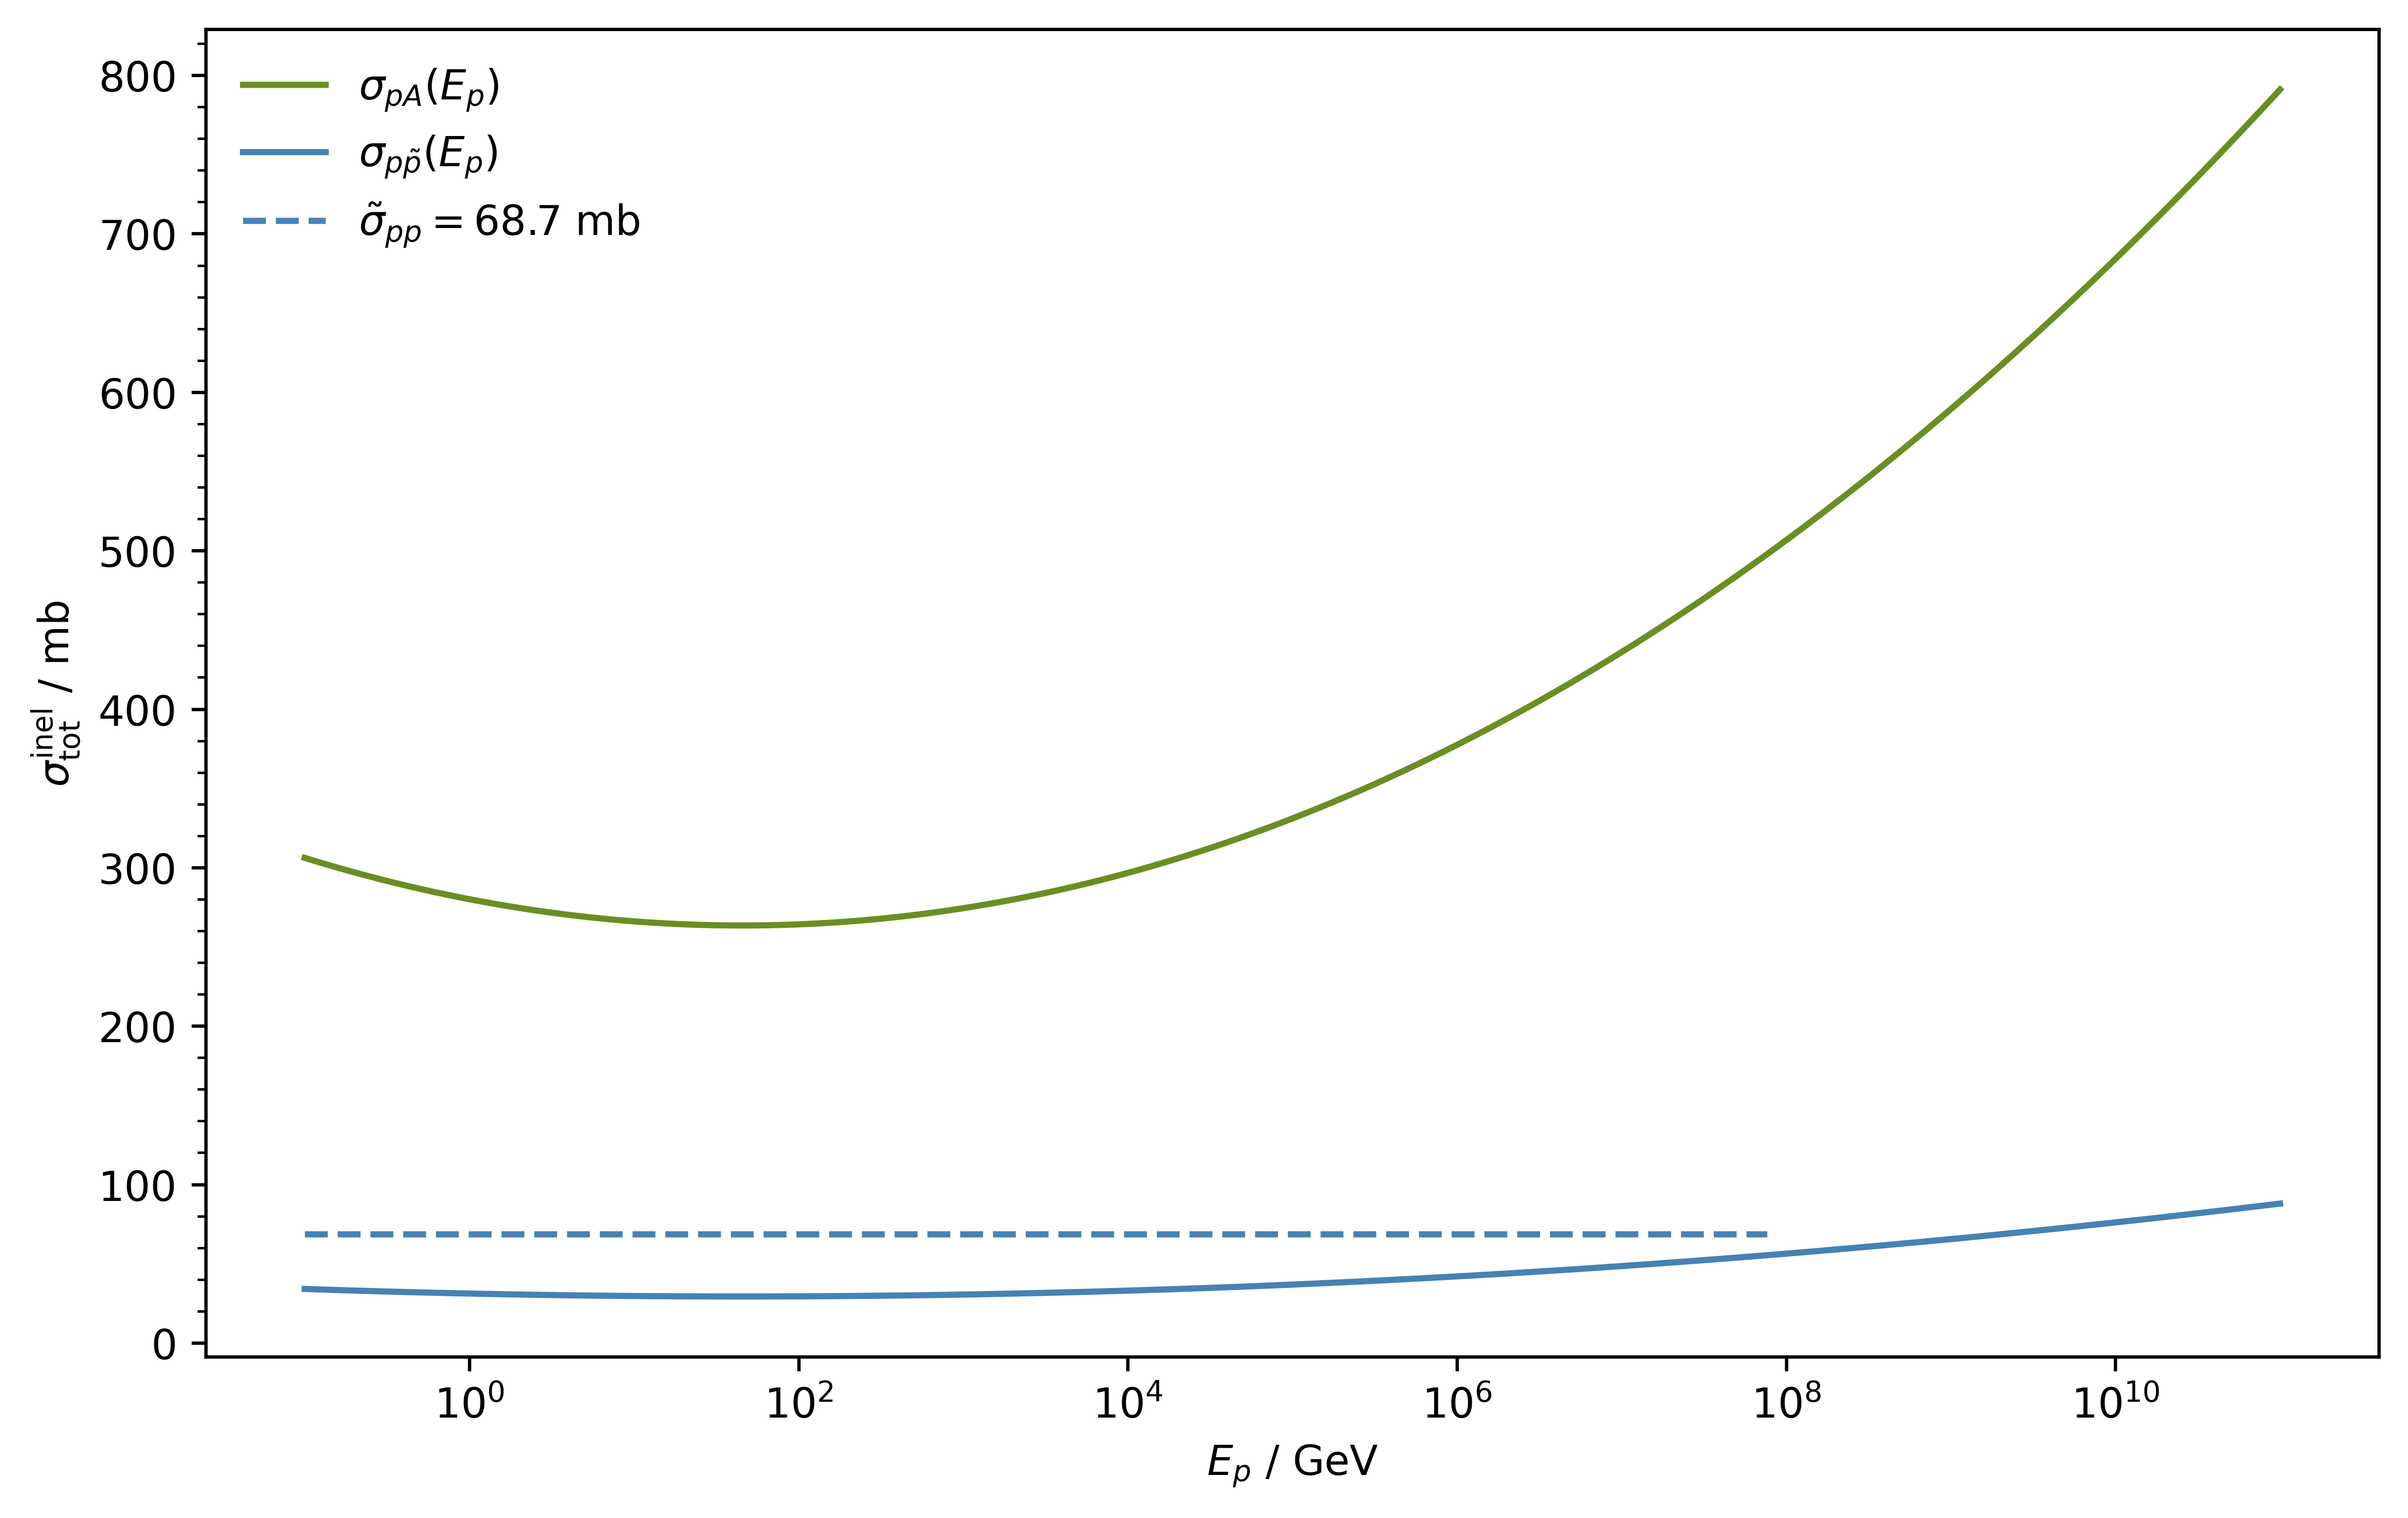

In [4]:
test_sig_pA = prot_air_cross_sec(test_Ep)
test_sig_pp = test_sig_pA / 9

x, y = test_Ep, test_sig_pA
plt.plot(x, y, label=r'$\sigma_{pA}(E_p)$')
x, y = test_Ep, test_sig_pp
plt.plot(x, y, label=r'$\sigma_{p\tilde{p}}(E_p)$')
x, y = test_Ep[[0, -520]], [68.7, 68.7]
plt.plot(x, y, '--', c='steelblue', label=r'$\tilde{\sigma}_{pp} = 68.7$ mb')

plt.xscale('log')

plt.xlabel(r'$E_p$ / GeV')
plt.ylabel(r'$\sigma_\text{tot}^\text{inel}$ / mb')
plt.legend()

plt.show()
plt.close()

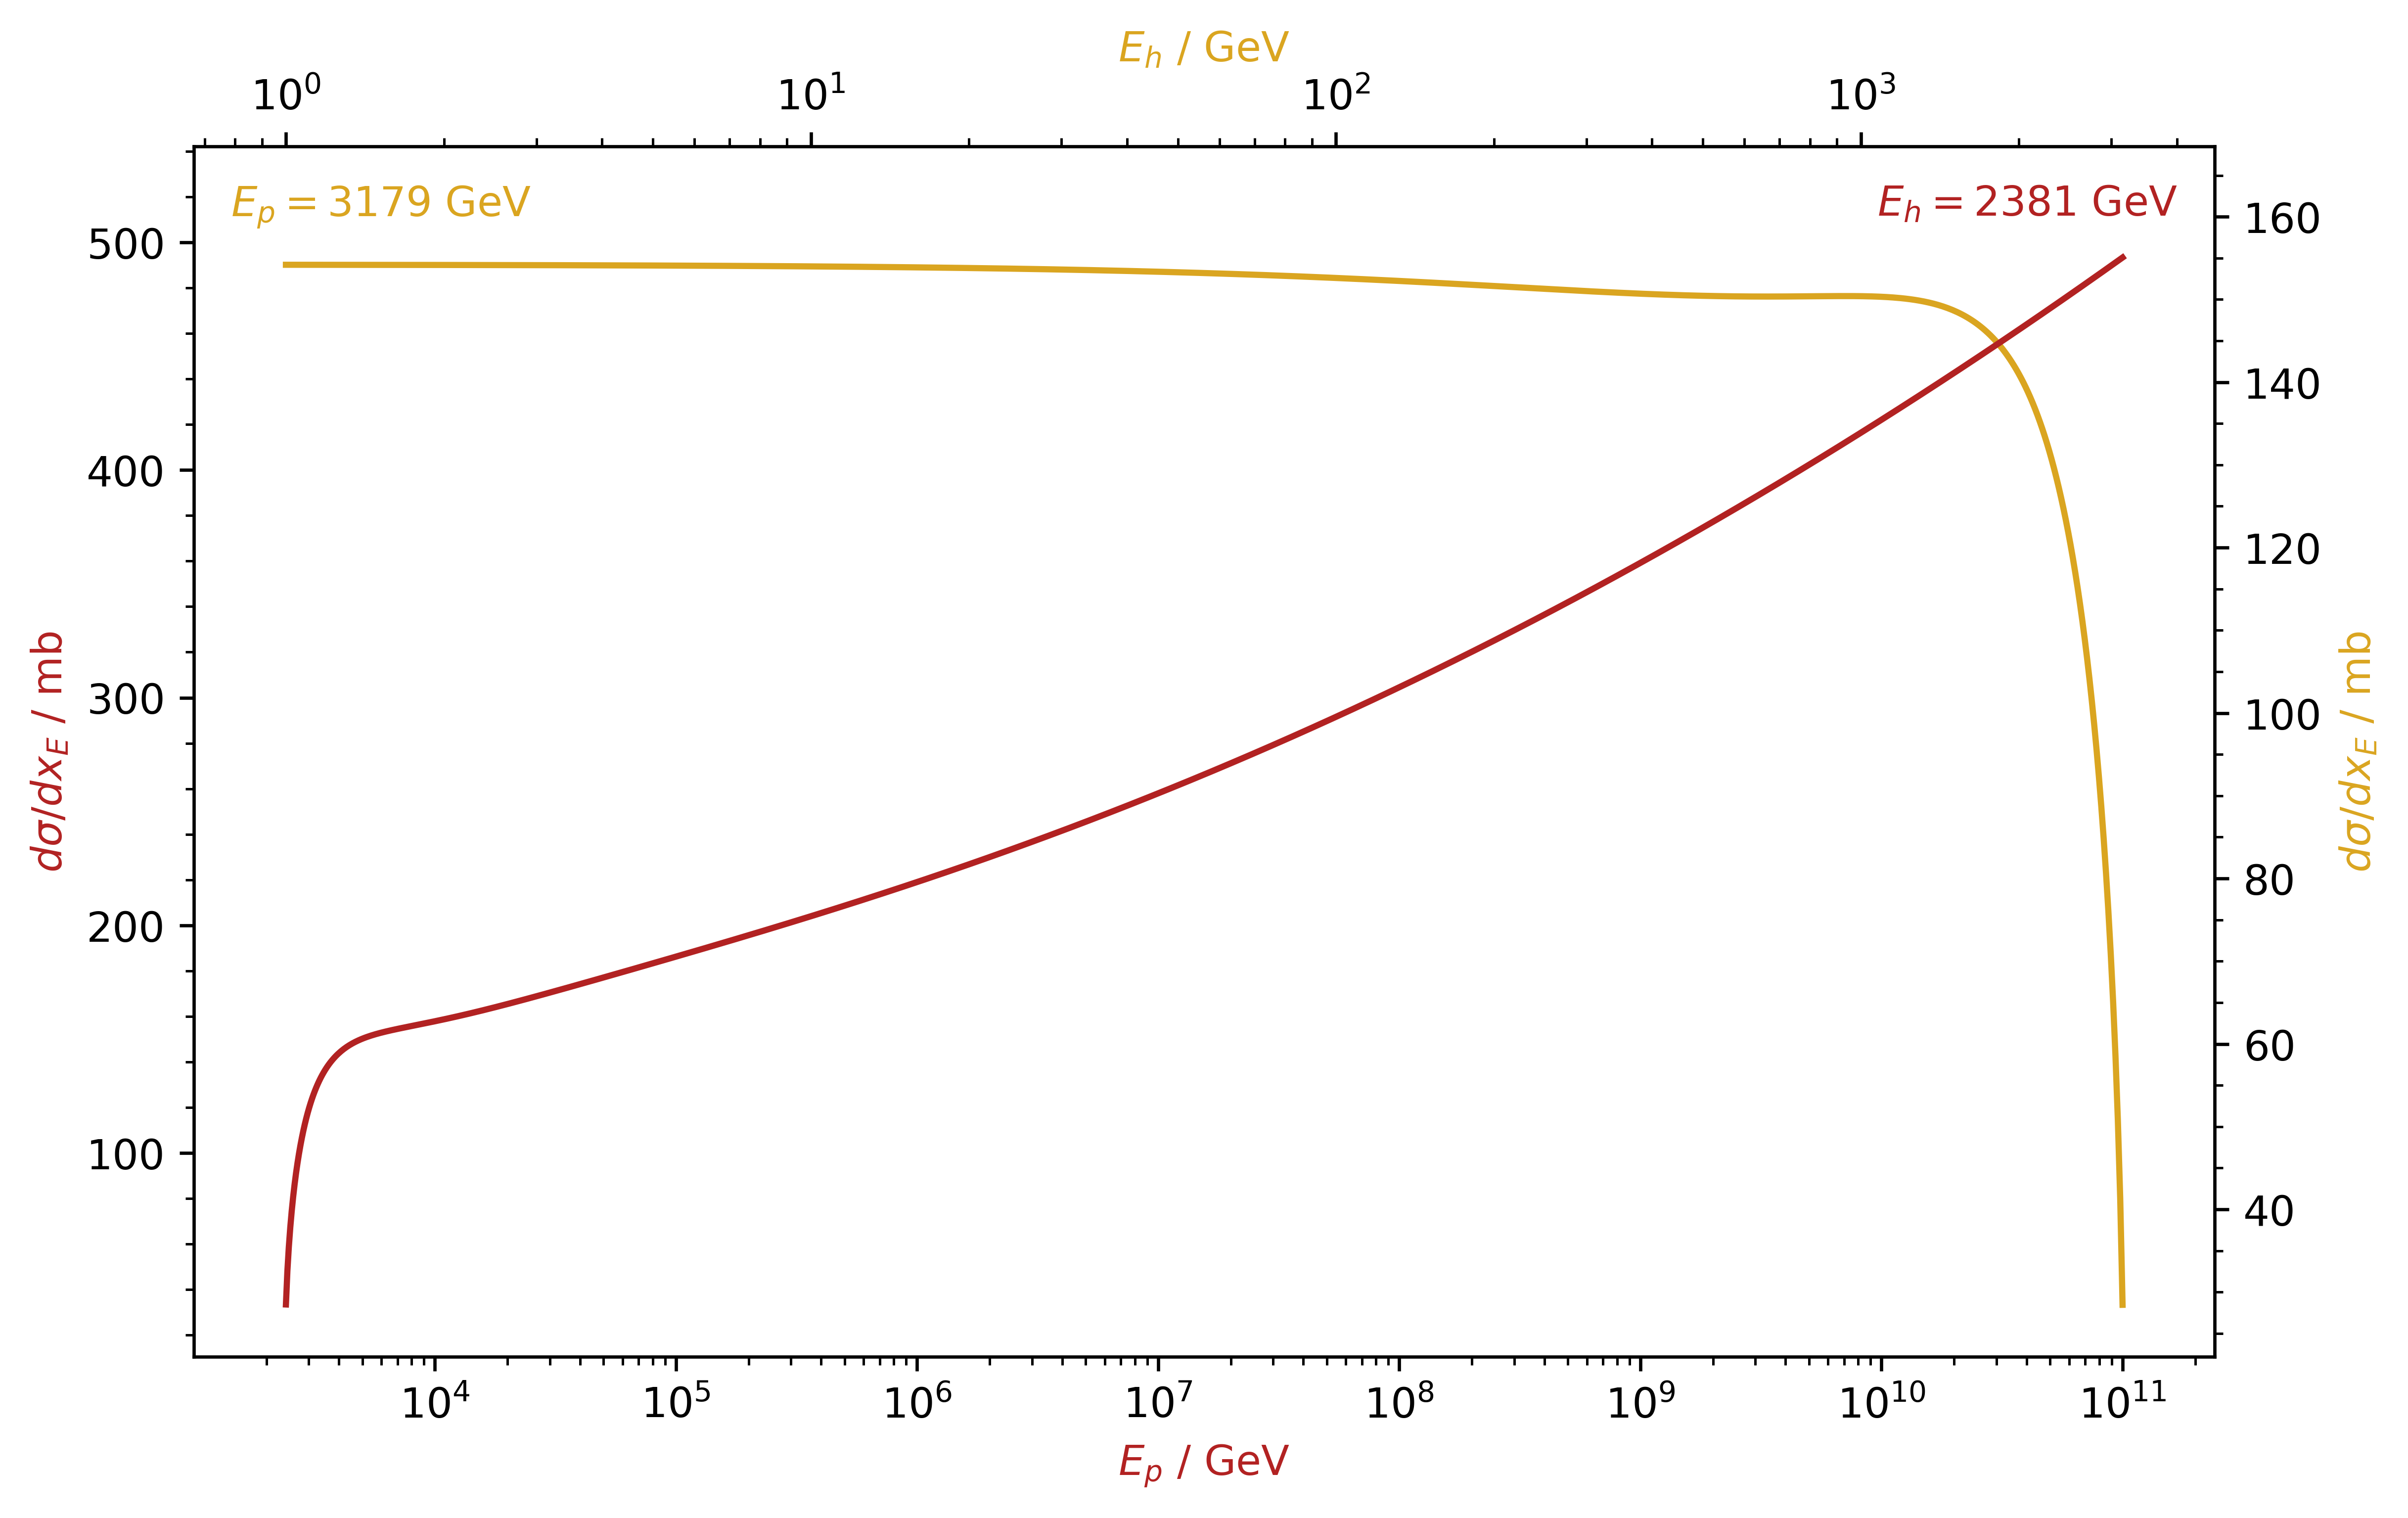

In [5]:
plt.figure().add_subplot(111, label='1')
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top') 
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    test_dsig_fix_p = prot_had_diff_cross_sec(test_Ep[750], test_Eh, test_sig_pp[750])

x, y = test_Eh, test_dsig_fix_p
plt.plot(x, y, c='goldenrod', label=f'$E_p = {test_Ep[750]:.0f}$ GeV')

plt.xscale('log')

plt.xlabel(r'$E_h$ / GeV', color='goldenrod')
plt.ylabel(r'$d\sigma/dx_E$ / mb', color='goldenrod')
leg = plt.legend(loc='upper left', labelcolor='linecolor', handlelength=0, handletextpad=0)
for h in leg.legend_handles:
    h.set_alpha(0)

plt.ylim(plt.ylim()[0], 1.05 * plt.ylim()[1])

plt.gcf().add_subplot(111, label='2', frame_on=False)

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    test_dsig_fix_h = prot_had_diff_cross_sec(test_Ep, test_Eh[750], test_sig_pp)

x, y = test_Ep, test_dsig_fix_h
plt.plot(x, y, c='firebrick', label=f'$E_h = {test_Eh[750]:.0f}$ GeV')

plt.xscale('log')

plt.xlabel(r'$E_p$ / GeV', color='firebrick')
plt.ylabel(r'$d\sigma/dx_E$ / mb', color='firebrick')
leg = plt.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0)
for h in leg.legend_handles:
    h.set_alpha(0)

plt.ylim(plt.ylim()[0], 1.05 * plt.ylim()[1])

plt.show()
plt.close()

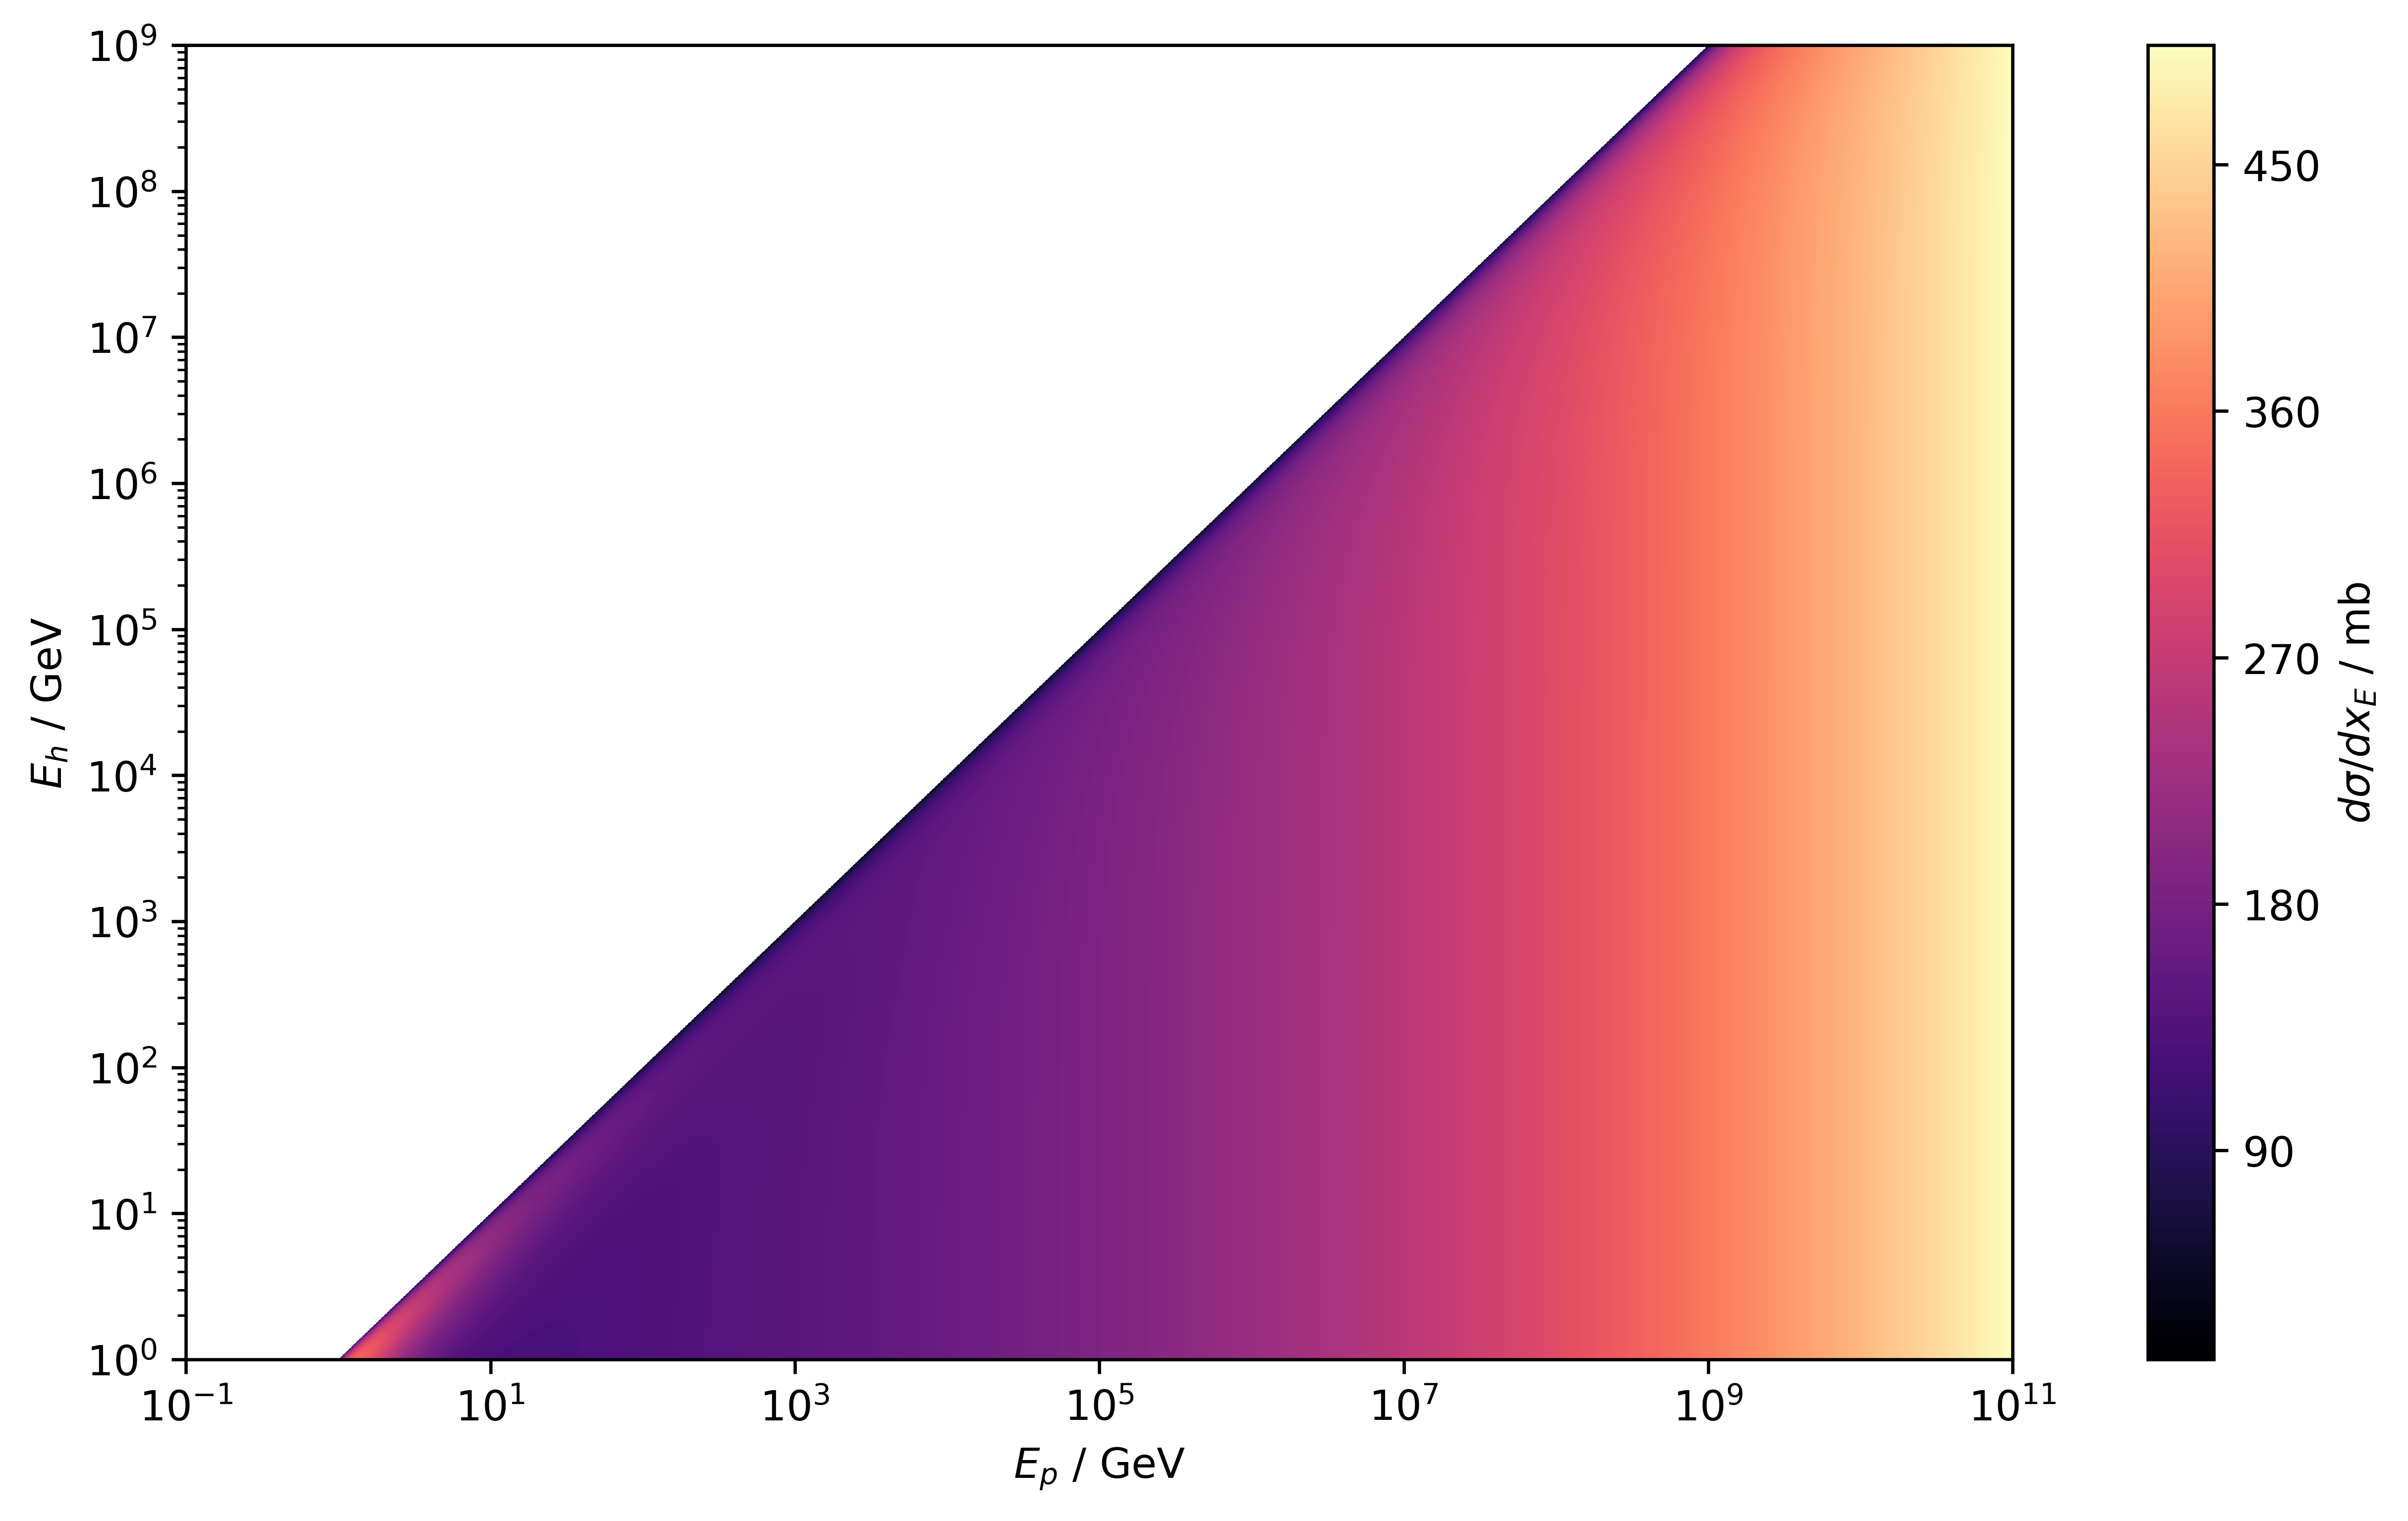

In [6]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    test_dsig_ph = prot_had_diff_cross_sec(test_Ep[None, :], test_Eh[:, None], test_sig_pp[None, :])

x, y, z = test_Ep, test_Eh, test_dsig_ph
plt.contourf(x, y, z, 666, zorder=-20)

plt.gca().set_rasterization_zorder(-10)

plt.colorbar(label=r'$d\sigma/dx_E$ / mb', ticks=np.linspace(0, 450, 6))

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$E_p$ / GeV')
plt.ylabel(r'$E_h$ / GeV')

plt.show()
plt.close()

In [7]:
def had_spec(t, Eh):
    c = 29979245800
    e = 4.8032047e-10
    I = 10**45
    B = 10**15
    R = 10**6
    Om = 10**4
    chi = 0.3 * np.pi
    facc = 0.1
    tsd = 2 * c**3 * I / (B**2 * R**6 * Om**2 * (1 + np.sin(chi)**2))
    A = facc * e * B * R**3 * Om**2 / (2 * c**2)
    EM = 624.151 * A / (1 + t / tsd)
    C = 2 * c / (facc * e**2)
    return C * prot_had_diff_cross_sec(EM, Eh, prot_air_cross_sec(EM)) / prot_air_cross_sec(EM)

samp_t = np.logspace(-1, 13, 2000)
samp_Eh = np.logspace(-3, 13, 2000)

Spindown Time

$$\begin{align*} t_{SD} = \frac{2 c^3 I_{NS}}{B_{NS}^2 R_{NS}^6 \Omega_0^2 (1 + \sin^2 \chi)} \end{align*}$$

Monochromatic Energy

$$\begin{align*} E^M(t) = A (1 + t / t_{SD})^{-1} &&
A \equiv \frac{f_\text{acc} e B_{NS} R_{NS}^3 \Omega_0^2}{2c^2} \end{align*}$$

Proton Spectrum

$$\begin{align*} \frac{d \dot{N}_p}{dE_p} (t, E_p) = B (1 + t / t_{SD})^{-1} \delta(E_p - E^M(t)) &&
B \equiv c^{-1} e^{-1} B_{NS} R_{NS}^3 \Omega_0^2 \end{align*}$$

Singular Interaction

$$\begin{align*} F_{pp \longrightarrow h} (E_h, E_p) = E_p^{-1} \sigma_{pp}^{-1}(E_p) \frac{d\sigma_{ph}}{dx_E}(E_h, E_p)\end{align*}$$

Hadronic Spectrum

$$\begin{align*} \frac{d \dot{N}_h}{dE_h} (t, E_h) = \int_{E_h}^\infty dE_p \frac{d \dot{N}_p}{dE_p} (t, E_p)
F_{pp\longrightarrow h} (E_p, E_h) = C \sigma_{pp}^{-1}(E^M(t)) \frac{d\sigma_{ph}}{dx_E}(E_h, E^M(t)) &&
C \equiv A^{-1}B = 2ce^{-2}f_\text{acc}^{-1} \end{align*}$$



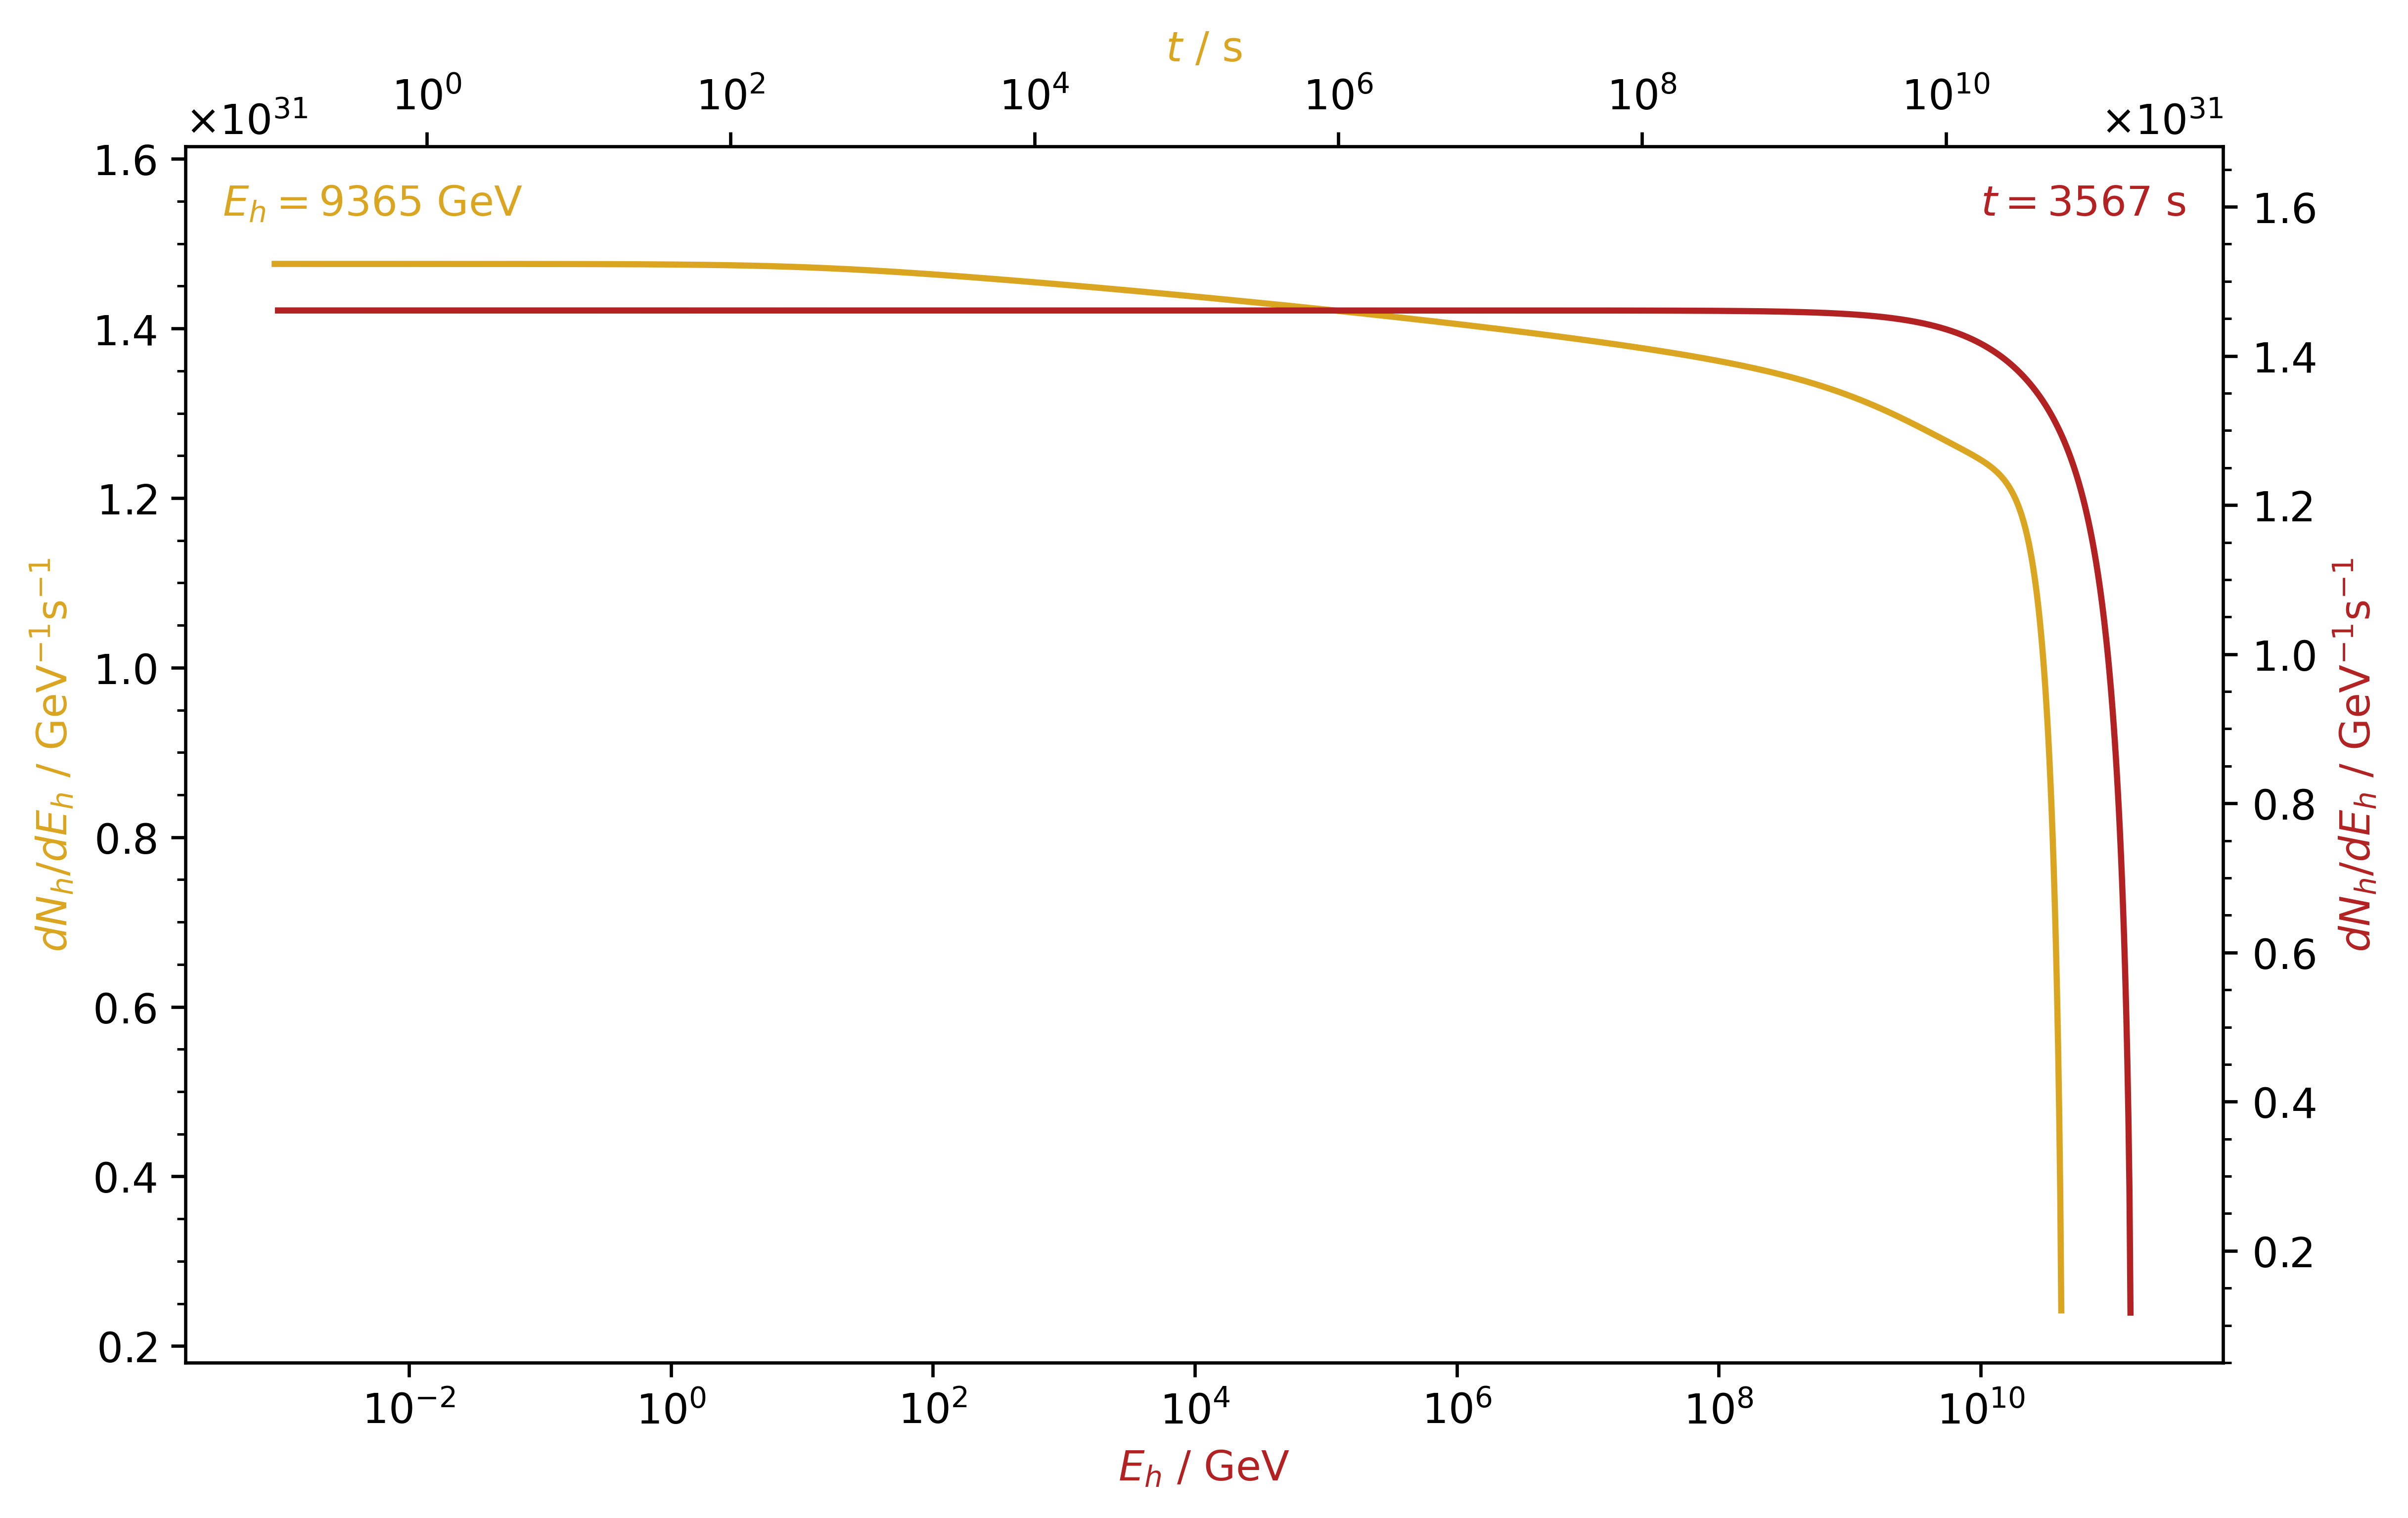

In [8]:
plt.figure().add_subplot(111, label='1')
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    samp_h_spec_fix_h = had_spec(samp_t, samp_Eh[871])

x, y = samp_t, samp_h_spec_fix_h
plt.plot(x, y, c='goldenrod', label=f'$E_h = {samp_Eh[871]:.0f}$ GeV')

plt.xscale('log')

plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.xlabel(r'$t$ / s', color='goldenrod')
plt.ylabel(r'$dN_h/dE_h$ / GeV$^{-1}$s$^{-1}$', color='goldenrod')
leg = plt.legend(loc='upper left', labelcolor='linecolor', handlelength=0, handletextpad=0)
for h in leg.legend_handles:
    h.set_alpha(0)

plt.ylim(plt.ylim()[0], 1.05 * plt.ylim()[1])
plt.xlim(plt.xlim()[0], 3 * plt.xlim()[1])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.gcf().add_subplot(111, label='2', frame_on=False)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position('right')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    samp_h_spec_fix_t = had_spec(samp_t[650], samp_Eh)

x, y = samp_Eh, samp_h_spec_fix_t
plt.plot(x, y, c='firebrick', label=f'$t = {samp_t[650]:.0f}$ s')

plt.xscale('log')

plt.gca().yaxis.set_minor_formatter(mpl.ticker.NullFormatter())

plt.xlabel(r'$E_h$ / GeV', color='firebrick')
plt.ylabel(r'$dN_h/dE_h$ / GeV$^{-1}$s$^{-1}$', color='firebrick')
leg = plt.legend(loc='upper right', labelcolor='linecolor', handlelength=0, handletextpad=0)
for h in leg.legend_handles:
    h.set_alpha(0)

plt.ylim(plt.ylim()[0], 1.1 * plt.ylim()[1])
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

plt.show()
plt.close()

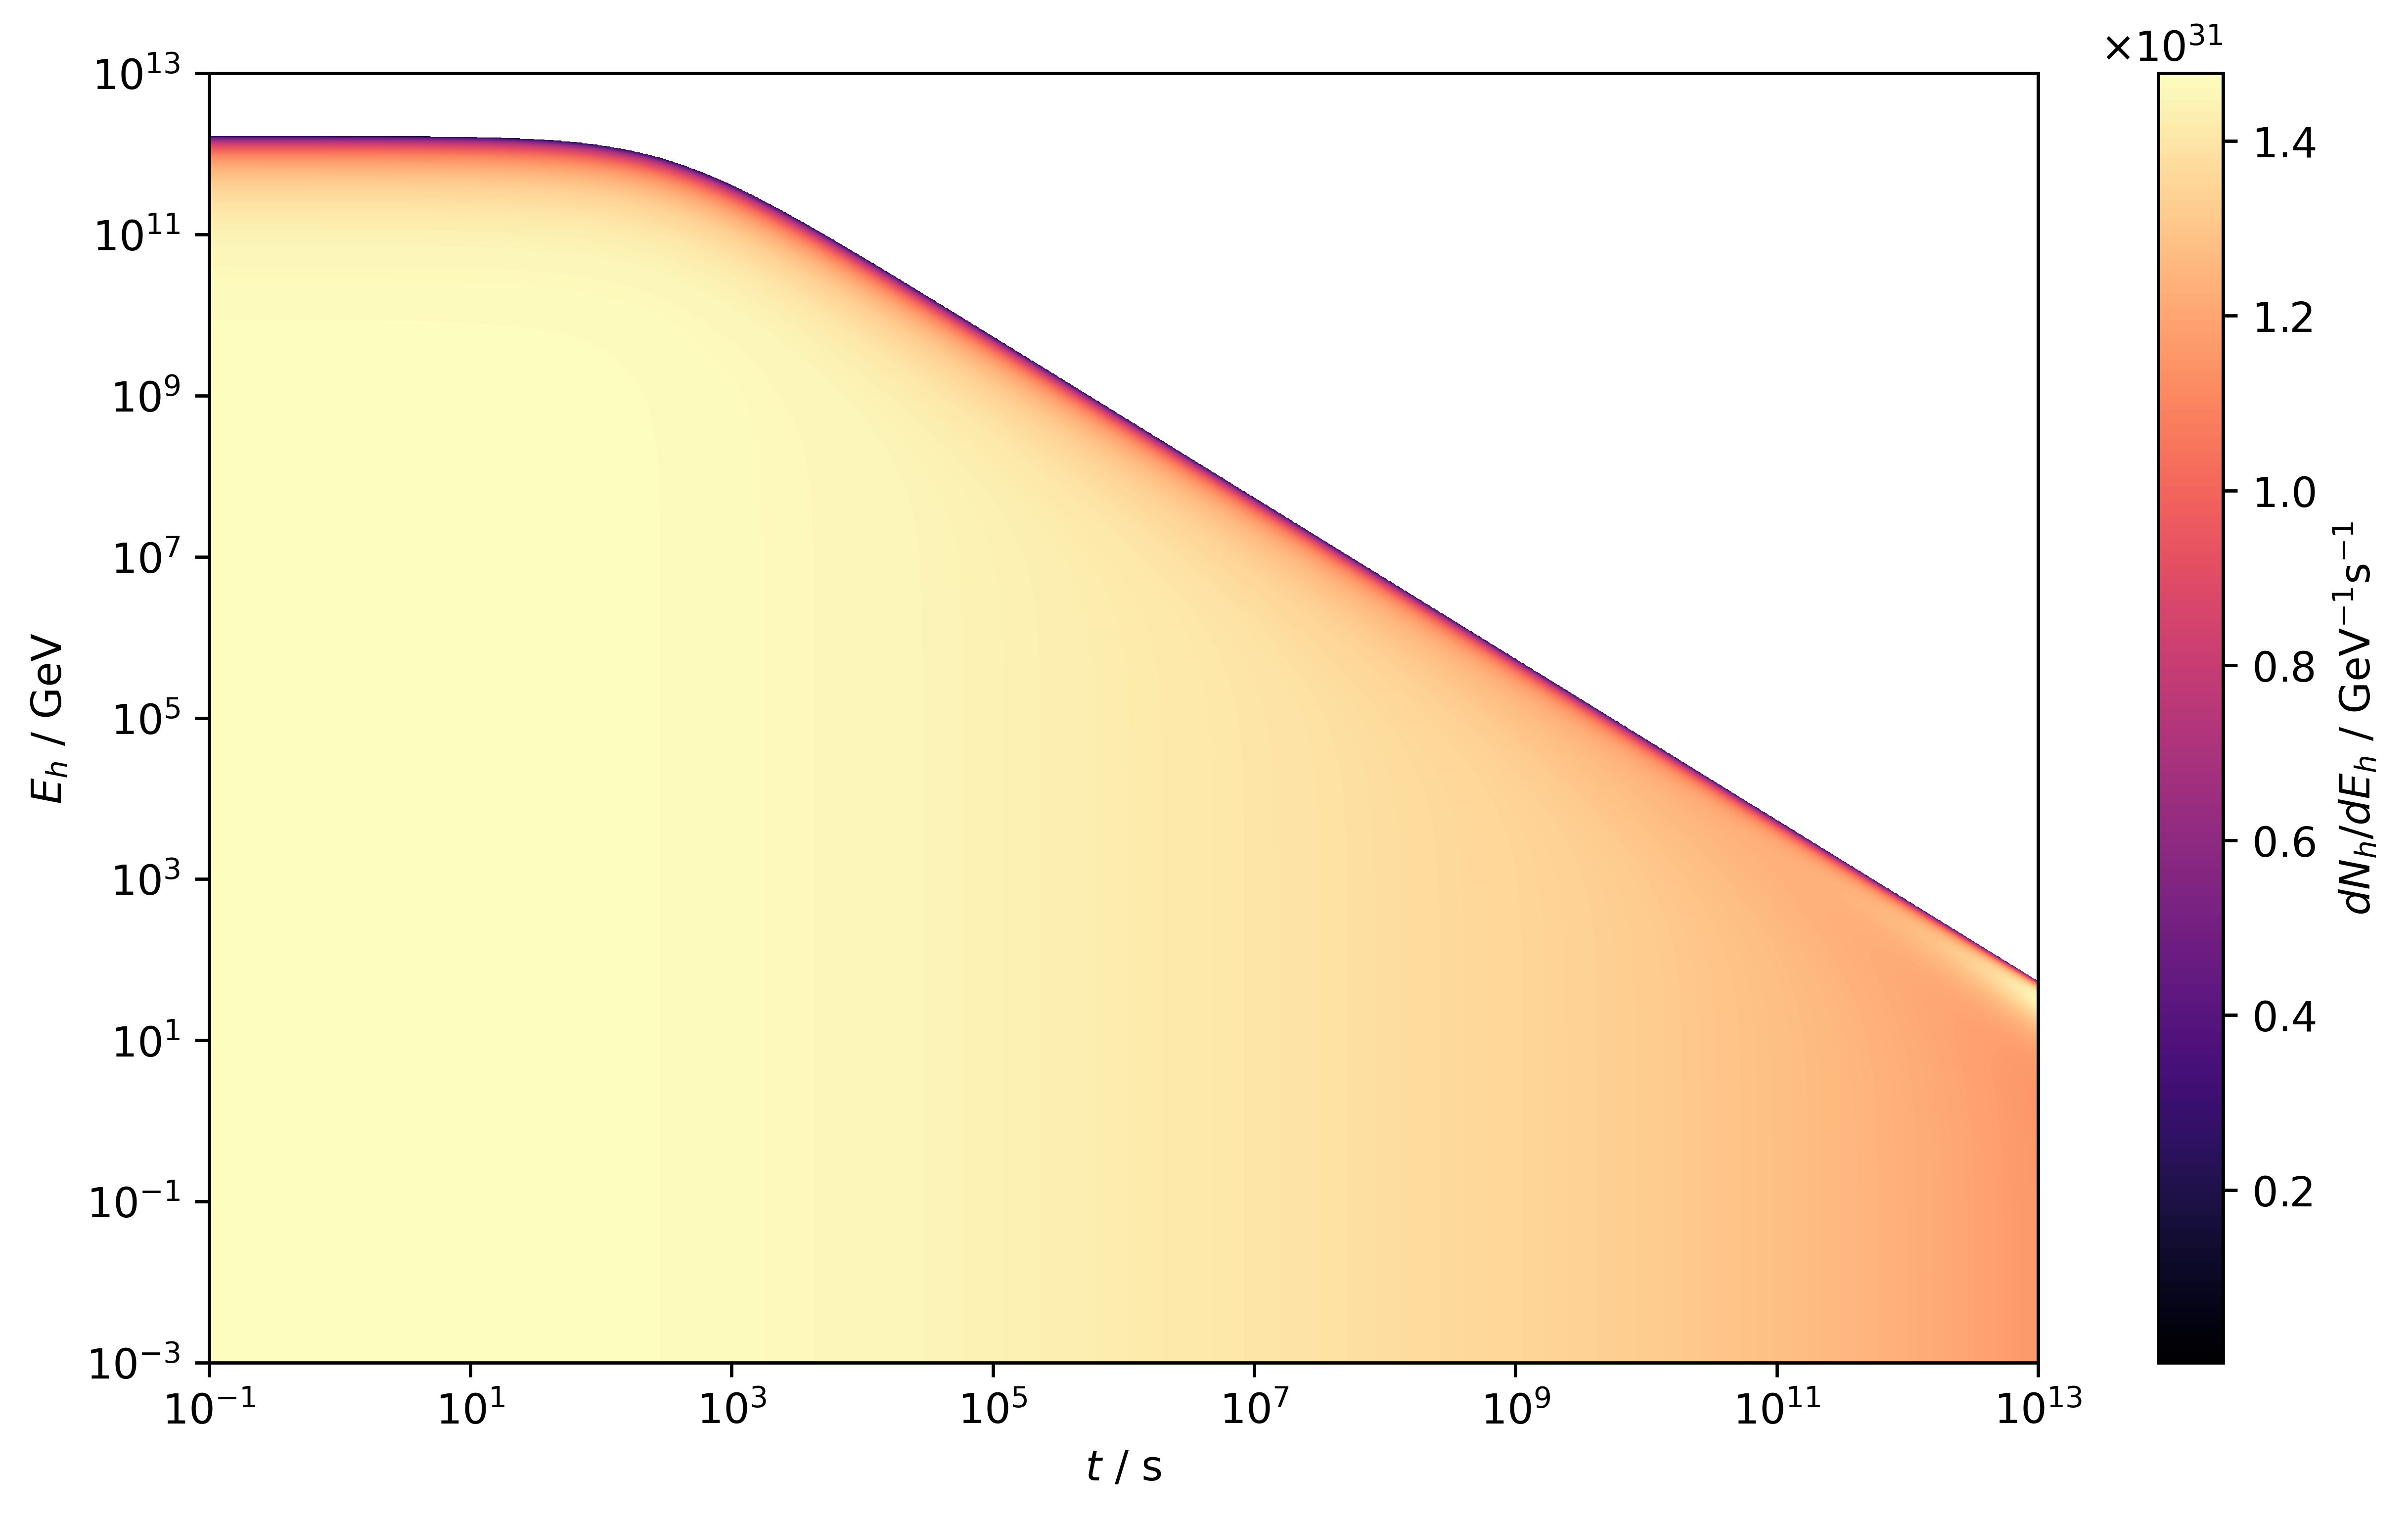

In [9]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    test_h_spec = had_spec(samp_t[None, :], samp_Eh[:, None])

x, y, z = samp_t, samp_Eh, test_h_spec
plt.contourf(x, y, z, 666, zorder=-20)

plt.gca().set_rasterization_zorder(-10)

tix = np.linspace(0.2e31, 1.4e31, 7)
cbar = plt.colorbar(label=r'$dN_h/dE_h$ / GeV$^{-1}$s$^{-1}$', ticks=tix, pad=0.01)
cbar.formatter.set_useMathText(True)

plt.xscale('log')
plt.yscale('log')

plt.xlabel(r'$t$ / s')
plt.ylabel(r'$E_h$ / GeV')

plt.show()
plt.close()

#### Active Galactic Nucleus